In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import datetime
import pytz
import uproot 
import numpy.ma as ma
import scipy.optimize as scipy
import math
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from matplotlib.path import Path
import pickle
import pickletools
from matplotlib import gridspec
from scipy.optimize import curve_fit, fmin, fminbound, minimize
from FV_class import toolbox

In [2]:
# Define class object
tb = toolbox()

In [3]:
# load general data
unsalted = uproot.open('/global/homes/k/kwild/ALPACA/run/SR3RunsAnalysis/SR3-WSv8_LZAP-5.5.3_unsalted.files.root')
salted = uproot.open('/global/homes/k/kwild/ALPACA/run/SR3RunsAnalysis/SR3-WSv8_LZAP-5.5.3_salted.files.root')
data = uproot.open('/global/homes/k/kwild/ALPACA/run/SR3RunsAnalysis/SR3-WSv8_LZAP-5.5.3_files.root')

# get keys
data.keys()

['SS;1']

In [4]:
# select the tree of interest from the file, in this case single scatter events, and get its keys

tree = data['SS;1']
tree.keys()

['runID',
 'eventID',
 'triggerTimeStamp_s',
 'triggerTimeStamp_ns',
 'daq_livetime',
 'trigger_livetime',
 'physics_livetime',
 'SS_raw_S1',
 'SS_raw_S2',
 'SS_raw_S2_top',
 'SS_raw_S2_bot',
 'SS_S1c',
 'SS_S2c',
 'SS_S2c_top',
 'SS_S2c_bot',
 'SS_driftTime_us',
 'SS_X_cm',
 'SS_Y_cm',
 'SS_R_cm',
 'SS_cX_cm',
 'SS_cY_cm',
 'SS_cR_cm',
 'SS_cZ_cm',
 'SS_s1TBA',
 'cxSR1_HSX',
 'cxSR1_SPEX',
 'cxSR1_S1rate',
 'cxSR1_muonV',
 'cxSR1_EA',
 'cxSR1_HSC',
 'cxSR1_stinger',
 'cxSR1_S1shape',
 'cxSR1_S1prom',
 'cxSR1_S1timing',
 'cxSR1_S1TBA',
 'cxSR1_S2TBA',
 'cxSR1_validXY',
 'cxSR1_S2width',
 'cxSR1_narrowS2',
 'cxSR1_S2earlypeak',
 'cxSR1_S2risetime',
 'cxSR1_FCRXY',
 'cxSR1_FV',
 'cxSR1_burst_noise',
 'cxSR1_buffer',
 'cxSR1_skinV',
 'cxSR1_skinVprompt',
 'cxSR1_skinVdel',
 'cxSR1_ODV',
 'cxSR1_ODVprompt',
 'cxSR1_ODVdel',
 'cxSR3_HSX',
 'cxSR3_SPEX',
 'cxSR3_S1rate',
 'cxSR3_muonV',
 'cxSR3_ETV',
 'cxSR3_HSC',
 'cxSR3_stinger',
 'cxSR3_S1TBA',
 'cxSR3_S2TBA',
 'cxSR3_S2XYquality',
 'cxSR

In [5]:
# declare variables
# get the data from the trees

# now including all available SR3 cuts as of 07Nov2023

# signal quality
dT_us = np.array(tree['SS_driftTime_us'])
S1_phd = np.array(tree['SS_raw_S1'])
S2_phd = np.array(tree['SS_raw_S2'])
S1c_phd = np.array(tree['SS_S1c'])
S2c_phd = np.array(tree['SS_S2c'])
x_cm = np.array(tree['SS_X_cm'])
y_cm = np.array(tree['SS_Y_cm'])
r2_cm2 = x_cm**2 + y_cm**2

# pulse info
eventID = np.array(tree['eventID'])
runID = np.array(tree['runID'])
triggerTimeStamp_s = np.array(tree['triggerTimeStamp_s'])
triggerTimeStamp_ns = np.array(tree['triggerTimeStamp_ns'])

In [6]:
# get pickled data 

# Open the pickle file in binary read mode and load the data

# Get the default protocol version used in the pickle file
protocol_version = pickle.DEFAULT_PROTOCOL
# Print the protocol version
print(f"Pickle Protocol Version: {protocol_version}")

# Function to load data from a pickle file and display it
def load_and_display_data(file_name):
    with open(file_name, 'rb') as file:
        loaded_data = pickle.load(file)
        # print(f"Loaded Data from {file_name}:")
        # print(loaded_data)
        # print()
    return loaded_data

# File names of the pickle files
file_names = ['SR3v8_Xe131m_events_data-selection.pickle','SR3v8_Xe131m_dT_slices.pickle','SR3v8_Xe131m_wall_fit.pickle']

# Load data from each pickle file and store in a list
loaded_data_list = [load_and_display_data(file_name) for file_name in file_names]

Pickle Protocol Version: 4


In [7]:
# Access the wall fit variables

# selected data Xe 131m
S1_phd_Xe131m = loaded_data_list[0]['S1_phd_xe131m']
S2_phd_Xe131m = loaded_data_list[0]['S2_phd_xe131m']
S1c_phd_Xe131m = loaded_data_list[0]['S1c_phd_xe131m']
S2c_phd_Xe131m = loaded_data_list[0]['S2c_phd_xe131m']
x_cm_Xe131m = loaded_data_list[0]['x_cm_xe131m']
y_cm_Xe131m = loaded_data_list[0]['y_cm_xe131m']
dT_us_Xe131m = loaded_data_list[0]['dT_us_xe131m']
r2_cm2_Xe131m = loaded_data_list[0]['r2_cm2_xe131m']
eventID_Xe131m = loaded_data_list[0]['eventID_xe131m']
runID_Xe131m = loaded_data_list[0]['runID_xe131m']
trigTime_s_POSIX_Xe131m = loaded_data_list[0]['trigTime_s_POSIX_xe131m']
trigTime_ns_past_POSIX_Xe131m = loaded_data_list[0]['trigTime_ns_past_POSIX_xe131m']

# points for wall fitting  
dT_Xe131m_points = loaded_data_list[1]['dT_mid']
r2_Xe131m_points = loaded_data_list[1]['r2_Xe131m_wall']
d_r2_Xe131m_points = loaded_data_list[1]['d_r2_Xe131m_wall']
num_slices_Xe131m = loaded_data_list[1]['num_dT_slices']

# wall fit  Xe 131m
wall_fit_coeffs_Xe131m = loaded_data_list[2]['wall_fit_coeffs_Xe131m']
wall_fit_cov_matrix_Xe131m = loaded_data_list[2]['wall_fit_cov_matrix_Xe131m']
dT_us_fit_Xe131m = loaded_data_list[2]['dT_us_fit_Xe131m']
r2_cm2_fit_Xe131m = loaded_data_list[2]['r2_cm2_fit_Xe131m']

In [8]:
# drift time limits
min_dT = 71
max_dT = 1030

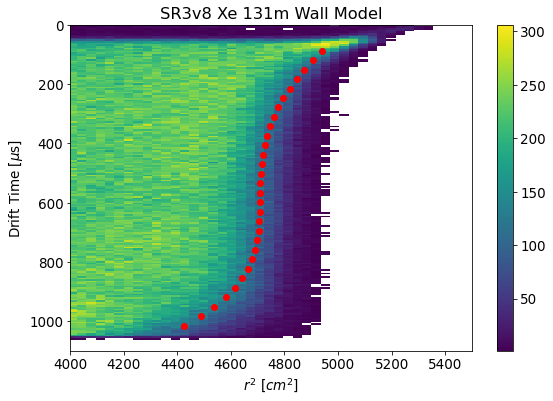

In [9]:
# plotting Xe 131m wall 

# Set up the figure and axes for subplots
fig, ax1 = plt.subplots(figsize=(9, 6))

# set the number of bins and range for drift time vs r2
num_bins = 200
plot_range = [[0.,7000.], [0.,1100.]]

# access variables

# data selections 
r2_points = r2_Xe131m_points
d_r2_points = d_r2_Xe131m_points # uncertainty in r2
dT_points = dT_Xe131m_points
# wall fit
r2_fit = r2_cm2_fit_Xe131m
dT_fit = dT_us_fit_Xe131m
# drift time mask 
dT_lim_mask = (dT_fit > min_dT) & (dT_fit < max_dT)
# limit data with mask 
r2_fit_lim = r2_fit[dT_lim_mask]
dT_fit_lim = dT_fit[dT_lim_mask]

# drift time vs. r^2
hist_r2_dT = ax1.hist2d(r2_cm2_Xe131m, dT_us_Xe131m, bins = num_bins, range = plot_range, cmin=1, alpha = 1)
# Add colorbars to the plot
cbar = fig.colorbar(hist_r2_dT[3], ax=ax1)

# # Plot the wall position
# plt.plot(r2_fit_lim, dT_fit_lim, linewidth=3, color="xkcd:red orange", label='Xe 131m Wall')

plt.scatter(r2_fit_lim, dT_fit_lim, color='red')

# Add labels
ax1.set_xlabel('$r^2$ [${cm}^2$]')
ax1.set_ylabel('Drift Time [$\mu$s]')
ax1.set_title('SR3v8 Xe 131m Wall Model')
ax1.set_xlim(4000,5500)
# plt.legend()

# flip y-axis
plt.gca().invert_yaxis()

In [14]:
# look at time dependence 
# look at one time interval slice first 

ts_bins = 30
timestamps = trigTime_s_POSIX_Xe131m + (1e-9 * trigTime_ns_past_POSIX_Xe131m)
cts, ts_edges = np.histogram(timestamps, bins=ts_bins)

# Initialize an empty array time_int_masks
time_int_masks = np.empty((ts_bins, len(timestamps)), dtype=bool)
time_int_starts = np.empty((ts_bins, len(timestamps)), dtype=bool)
time_int_ends = np.empty((ts_bins, len(timestamps)), dtype=bool)
time_int_labels = []
time_int_dict = {}  # Dictionary to associate masks with labels

for i in range(ts_bins):
    # Format title string for date range
    start_date = tb.convert_UTC_to_MT(ts_edges[i])
    end_date = tb.convert_UTC_to_MT(ts_edges[i + 1])
    title_str = f'{start_date.day} {start_date.strftime("%b")}. {start_date.year} – ' \
                f'{end_date.day} {end_date.strftime("%b")}. {end_date.year}'
    
    # Create cuts and apply for the plot summary
    cuts = (timestamps >= ts_edges[i]) & (timestamps < ts_edges[i + 1])
    
    # Initialize histogram_data as an empty dictionary
    histogram_data = {}
    
    # Store cuts in the dictionary with the corresponding label
    time_int_dict[title_str] = cuts, start_date, end_date, histogram_data

    # store cuts outside loop
    time_int_masks[i] = cuts
    time_int_starts[i] = start_date
    time_int_ends[i] = end_date
    time_int_labels.append(title_str)

# Assuming you have the OrderedDict named time_int_dict
time_ints_list = list(time_int_dict.keys())

# # view list of time intervals
# for key in time_ints_list:
#     print(key)

# time intervals
first_time_int = time_ints_list[0]
last_time_int_index = len(time_int_dict) - 1
last_time_int = time_ints_list[last_time_int_index]

# time interval selection
current_time_int_index = 29
current_time_int = time_ints_list[current_time_int_index]

print('There are',len(time_int_dict),'time intervals.')
print('First time interval: ', first_time_int)
print('Last time interval: ', last_time_int)
print()
print('Current time interval: ',current_time_int)
print()
print()
print()

There are 30 time intervals.
First time interval:  11 Jun. 2023 – 16 Jun. 2023
Last time interval:  31 Oct. 2023 – 5 Nov. 2023

Current time interval:  31 Oct. 2023 – 5 Nov. 2023





Text(0.5, 1.01, 'SR3 WSv8 LZAP-5.5.3: Xe 131m - 31 Oct. 2023 – 5 Nov. 2023')

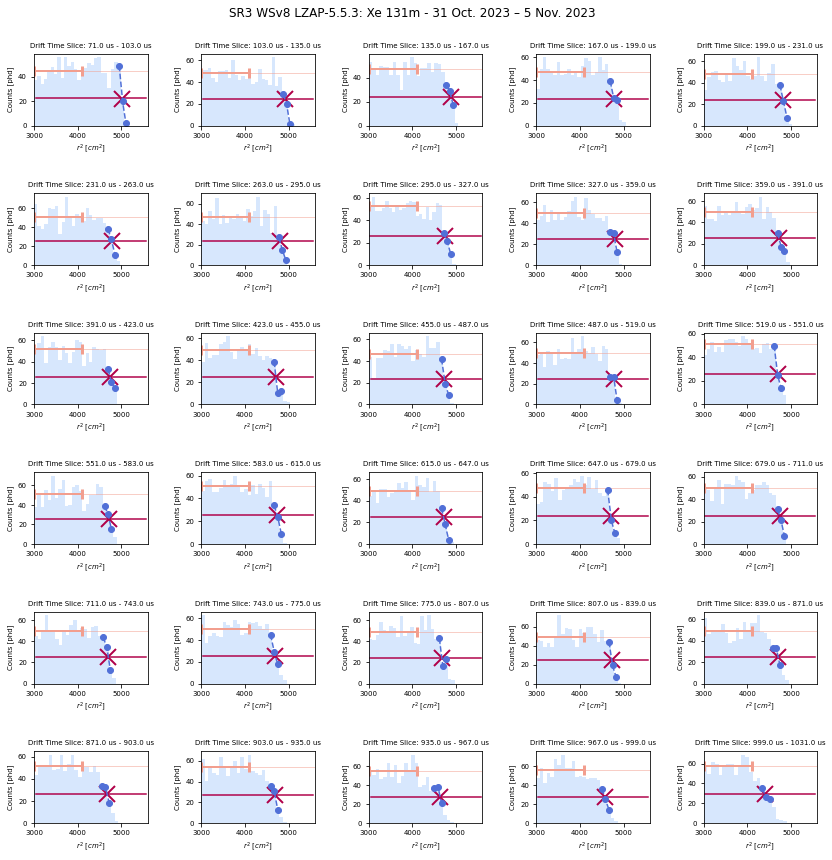

In [15]:
# get stored data from interval
one_int_mask, one_int_start, one_int_end, histogram_data = time_int_dict[current_time_int]

# make drift time slices with interpolation

# Constant line function for later fitting the histogram
def f_const(x, c):
    return np.ones_like(x) * c

# Declare variables

# dT (us) and r2 (cm2)
dT = dT_us_Xe131m[one_int_mask]
r2 = r2_cm2_Xe131m[one_int_mask]
# constant drop off (cm2)
r2_drop_off = 4100 

# Define slice width and starting point
slice_width = 32.  # us
start_time = min_dT  # 71 us
end_time = max_dT  # max 1030 us

# Define the number of slices and plots per row
num_slices = math.ceil((end_time - start_time) / slice_width)
plots_per_row = [5] * math.ceil(num_slices / 5)
plots_per_row[-1] = num_slices - sum(plots_per_row[:-1])
num_rows = len(plots_per_row)
    
# Check if there is any data available
if len(r2) == 0:
    print("No data available for the specified interval.")
    
else:
    # make drift time slices with interpolation

    # Initialize arrays to store values for each slice
    array_length = num_slices
    r2_cm2_hh_loop = np.zeros(array_length)
    d_r2_cm2_hh_loop = np.zeros(array_length)
    dT_start_loop = np.zeros(array_length)
    dT_end_loop = np.zeros(array_length)
    dT_middle_loop = np.zeros(array_length)
    slice_counts_loop = np.zeros(array_length)

    # Set up the figure and subplots
    fig, axs = plt.subplots(num_rows, max(plots_per_row), figsize=(12, num_rows * 2))

    # Flatten the axs array for easier indexing
    axs = axs.flatten()
    
    # Iterate over the slices
    
    for i in range(num_slices):
        
        # Define the slice boundaries
        slice_start = start_time + i * slice_width
        slice_end = slice_start + slice_width

        # get drift time start, stop, and middle point
        dT_start = slice_start
        dT_end = slice_end
        dT_middle = (slice_start + slice_end) / 2.

        # Create a mask to select data within the current slice
        # this mask will include how the histogram is being fitted as well

        # Declare the number of bins and range of histo
        range_start = 3000
        range_stop = 5600
        plot_range = (range_start,range_stop)

        # define the mask of each slice in terms of dT and r2 histo range
        slice_mask = (dT > slice_start) & (dT <= slice_end) & (r2 > range_start) & (r2 <= range_stop)
        # Filter data with the mask
        r2_slice = r2[slice_mask]

        # get counts in each slice 
        # determine the number of bins 
        counts_per_slice = len(r2_slice)
        num_bins = int(np.sqrt(counts_per_slice))

        # Set the current subplot
        ax = axs[i]

        
        # Set up histogram
        hist, bins, _ = ax.hist(r2_slice, bins=num_bins, range=plot_range, color='xkcd:powder blue', alpha=0.5)
        bin_centers = (bins[:-1] + bins[1:]) / 2.

        # only use bins from constant area before the line drops off on the right 
        range_mask = (hist > 0) & (bin_centers < r2_drop_off)
        counts = hist[range_mask]
        xdata = bin_centers[range_mask]
        ydata = counts #f_const(xdata, counts)

        # find height of counts
        # height is popt, variance in height is pcov
        popt, pcov = scipy.curve_fit(f_const, xdata, ydata, p0=[np.max(hist[0])])
        # get uncertainty in height (uncertainty = standard dev = sqrt(pcov))
        perr = np.sqrt(np.diag(pcov))

        # define drift time (us) for each slice
        dT_slice = (slice_start - slice_end) / 2.
        # define half height and its uncertainty for each slice
        hh = popt[0] / 2.
        d_hh = (1/2.) * perr
        # create array with the same length as bin_centers, fill with hh (for plotting)
        hh_array = np.full_like(bin_centers, hh)

        # interpolation 
        # set up 3 adjacent bins, whose average is the closest value to hh

        # Calculate the sums of the y-values for possible 5 adjacent bins
        # adds 3 adjacent bin values
        sums = np.convolve(hist, np.ones(3), mode='valid')
        # Find the index of the sum closest to the desired value of (hist - hh)
        # this works by finding which set of 3 bins has (sums - 3*hh) closest to 0
        # it grabs the index of the first bin
        sum_index = np.argmin(np.abs(sums - 3 * hh))
        # Get the indices of the 3 adjacent bins corresponding to the selected sum
        indices = np.arange(sum_index, sum_index + 3)
        # Retrieve the bin center values for those indices
        bin_centers_selected = bin_centers[indices]

        # Create an array of the corresponding (hist - hh) values
        h_diff_selected = hist[indices] - hh #gives height difference
        hh_selected = h_diff_selected + hh #gives half height of selected points
        # create array of finer points of h_selected for later computing residuals
        hh_selected_fine = np.linspace(hh_selected[0], hh_selected[-1], num = 1000)

        # Fit a linear interpolation to the selected bin centers and (hist - hh) values
        interp_func = interp1d(bin_centers_selected, h_diff_selected, kind='linear')

        # Generate a finer grid of points for interpolation
        interp_x = np.linspace(bin_centers_selected[0], bin_centers_selected[-1], num=1000)
        # generate corresponding y values for plotting 
        interp_y = interp_func(interp_x)

        # Interpolate to find the x-value corresponding to (hist - hh)
        r2_cm2_hh = interp_x[np.argmin(np.abs(interp_func(interp_x)))]
        # estimate its uncertainty with residuals
        # Compute residuals 
        # (y-value) - interp_func(x)
        residuals = hh_selected_fine - interp_y
        # Estimate uncertainty of r2_cm2_hh
        d_r2_cm2_hh = np.std(residuals)
        # Retrieve the corresponding interpolated (hist - hh) value
        hh_interp = hh + interp_func(r2_cm2_hh)
        # for plotting, shift hh_interp values up to their proper location on the plot, coming from the hh point
        interp_y_shifted = interp_y + hh_interp

        # store all values in corresponding arrays
        r2_cm2_hh_loop[i] = r2_cm2_hh
        d_r2_cm2_hh_loop[i] = d_r2_cm2_hh
        dT_start_loop[i] = dT_start
        dT_end_loop[i] = dT_end
        dT_middle_loop[i] = dT_middle
        slice_counts_loop[i] = counts_per_slice

        # add labels, set axes of plots
        ax.set_xlabel('$r^2$ [${cm}^2$]', fontsize=7)
        ax.set_ylabel('Counts [phd]', fontsize=7)
        title = f"Drift Time Slice: {slice_start} us - {slice_end} us"
        ax.set_title(title, fontsize=7)
        ax.tick_params(axis='both', labelsize=7)
        ax.set_xlim([range_start, range_stop])

        # Plot the points at full height from fitting, x positions of the start and end, height as y position
        x_start, y_start = range_start, popt
        x_end, y_end = r2_drop_off, popt
        ax.plot(x_start, y_start, "|", markersize=10, mew=3, color='xkcd:blush')
        ax.plot(x_end, y_end, "|", markersize=10, mew=3, color='xkcd:blush')

        # Plot bold line at the full height in the actual range of the fitting 
        ax.plot([x_start, x_end], [y_start, y_end], '-', linewidth=2, label='Height', color='xkcd:blush')

        # Plot constant line at full height, through the whole x-range
        # declare final x location range_stop
        x_final, y_final = range_stop, popt
        ax.plot([x_start, x_final], [y_start, y_final], '-', linewidth=0.5, color='xkcd:blush')

        # Plot half height constant line
        ax.plot(bin_centers, hh_array, '-', label='Half Height', color='xkcd:raspberry')

        # Plot the point (r2_cm2_hh, hh_interp)
        ax.plot(r2_cm2_hh, hh_interp, 'x', markersize=16, mew=2, label='Interpolated Point', color='xkcd:raspberry')

        # plot data points used to interpolate
        ax.plot(bin_centers_selected, hh_selected, 'o', label='Data Points of Interpolation', color='xkcd:cornflower blue')

        # Plot the interpolated line
        ax.plot(interp_x, interp_y_shifted, '--', label='Interpolated Line at Half Height', color='xkcd:cornflower blue')

        # # toggle on to view each slice's result individually
        # # print r2_cm2_hh, hh, and popt
        # print(f"Slice: {slice_start} us - {slice_end} us")
        # print(f"Interpolated Half Height: {round(hh_interp, 1)}")
        # print(f"Interpolated r2: {round(r2_cm2_hh,1)} cm2")
        # print(f"Uncertainty in r2: {round(d_r2_cm2_hh,1)} cm2")
        # print()
    

    
# Remove empty subplots
for i in range(num_slices, num_rows * max(plots_per_row)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout(pad=2.0)

# Add main title above the subplots
main_title = f"SR3 WSv8 LZAP-5.5.3: Xe 131m - {current_time_int}"
fig.suptitle(main_title, y=1.01, fontsize=12)

In [12]:
# Initialize an empty dictionary to store all the values
time_int_wall_dict = {}

# Constant line function for fitting the histogram
def f_const(x, c):
    return np.ones_like(x) * c

for current_time_interval in time_int_labels:
    # get stored data from interval
    try:
        int_mask, int_start, int_end, histogram_data = time_int_dict[current_time_interval]
        
        # dT (us) and r2 (cm2)
        dT = dT_us_Xe131m[int_mask]
        r2 = r2_cm2_Xe131m[int_mask]
        # constant drop off (cm2)
        r2_drop_off = 4100

        # Check if there is any data available
        if len(r2) == 0:
            print(f"No data available for the specified interval: {current_time_interval}")
        else:
            # make drift time slices with interpolation
            # Define slice width and starting point
            slice_width = 30.  # us
            start_time = min_dT  # 65 us
            end_time = max_dT  # max 1044 us

            # Define the number of slices and plots per row
            num_slices = math.ceil((end_time - start_time) / slice_width)
            plots_per_row = [3] * math.ceil(num_slices / 3)
            plots_per_row[-1] = num_slices - sum(plots_per_row[:-1])
            num_rows = len(plots_per_row)
        
            # Initialize arrays to store values for each slice
            r2_cm2_hh_loop = np.zeros(num_slices)
            d_r2_cm2_hh_loop = np.zeros(num_slices)
            dT_start_loop = np.zeros(num_slices)
            dT_end_loop = np.zeros(num_slices)
            dT_middle_loop = np.zeros(num_slices)
            slice_counts_loop = np.zeros(num_slices)

            # Iterate over the slices
            for i in range(num_slices):
                # Define the slice boundaries
                slice_start = start_time + i * slice_width
                slice_end = slice_start + slice_width

                # get drift time start, stop, and middle point
                dT_start = slice_start
                dT_end = slice_end
                dT_middle = (slice_start + slice_end) / 2.

                # Create a mask to select data within the current slice
                # this mask will include how the histogram is being fitted as well

                # Declare the number of bins and range of histo
                range_start = 3000
                range_stop = 5600
                plot_range = (range_start, range_stop)

                # define the mask of each slice in terms of dT and r2 histo range
                slice_mask = (dT > slice_start) & (dT <= slice_end) & (r2 > range_start) & (r2 <= range_stop)
                # Filter data with the mask
                r2_slice = r2[slice_mask]

                # get counts in each slice 
                # determine the number of bins 
                counts_per_slice = len(r2_slice)
                num_bins = int(np.sqrt(counts_per_slice))
                
                # Set up histogram
                hist, bins, _ = ax.hist(r2_slice, bins=num_bins, range=plot_range, color='xkcd:powder blue', alpha=0.5)
                bin_centers = (bins[:-1] + bins[1:]) / 2.

                # only use bins from constant area before the line drops off on the right 
                range_mask = (hist > 0) & (bin_centers < r2_drop_off)
                counts = hist[range_mask]
                xdata = bin_centers[range_mask]
                ydata = f_const(xdata, counts)

                # find height of counts
                # height is popt, variance in height is pcov
                popt, pcov = scipy.curve_fit(f_const, xdata, ydata, p0=[np.max(hist[0])])
                # get uncertainty in height (uncertainty = standard dev = sqrt(pcov))
                perr = np.sqrt(np.diag(pcov))

                # define drift time (us) for each slice
                dT_slice = (slice_start - slice_end) / 2.
                # define half height and its uncertainty for each slice
                hh = popt[0] / 2.
                d_hh = (1/2.) * perr
                # create array with the same length as bin_centers, fill with hh (for plotting)
                hh_array = np.full_like(bin_centers, hh)

                # interpolation 
                # set up 3 adjacent bins, whose average is the closest value to hh

                # Calculate the sums of the y-values for possible 5 adjacent bins
                # adds 3 adjacent bin values
                sums = np.convolve(hist, np.ones(3), mode='valid')
                # Find the index of the sum closest to the desired value of (hist - hh)
                # this works by finding which set of 3 bins has (sums - 3*hh) closest to 0
                # it grabs the index of the first bin
                sum_index = np.argmin(np.abs(sums - 3 * hh))
                # Get the indices of the 3 adjacent bins corresponding to the selected sum
                indices = np.arange(sum_index, sum_index + 3)
                # Retrieve the bin center values for those indices
                bin_centers_selected = bin_centers[indices]

                # Create an array of the corresponding (hist - hh) values
                h_diff_selected = hist[indices] - hh #gives height difference
                hh_selected = h_diff_selected + hh #gives half height of selected points
                # create array of finer points of h_selected for later computing residuals
                hh_selected_fine = np.linspace(hh_selected[0], hh_selected[-1], num = 1000)

                # Fit a linear interpolation to the selected bin centers and (hist - hh) values
                interp_func = interp1d(bin_centers_selected, h_diff_selected, kind='linear')

                # Generate a finer grid of points for interpolation
                interp_x = np.linspace(bin_centers_selected[0], bin_centers_selected[-1], num=1000)
                # generate corresponding y values for plotting 
                interp_y = interp_func(interp_x)

                # Interpolate to find the x-value corresponding to (hist - hh)
                r2_cm2_hh = interp_x[np.argmin(np.abs(interp_func(interp_x)))]
                # estimate its uncertainty with residuals
                # Compute residuals 
                # (y-value) - interp_func(x)
                residuals = hh_selected_fine - interp_y
                # Estimate uncertainty of r2_cm2_hh
                d_r2_cm2_hh = np.std(residuals)

                # Accessing values from the nested dictionary for each slice
                histogram_data_for_slice = {
                    'r2_cm2_hh': r2_cm2_hh,  
                    'd_r2_cm2_hh': d_r2_cm2_hh,  
                    'dT_start': dT_start,
                    'dT_end': dT_end,
                    'dT_middle': dT_middle,
                    'slice_counts': counts_per_slice
                }

                # Update the values for each slice
                r2_cm2_hh_loop[i] = histogram_data_for_slice['r2_cm2_hh']
                d_r2_cm2_hh_loop[i] = histogram_data_for_slice['d_r2_cm2_hh']
                dT_start_loop[i] = histogram_data_for_slice['dT_start']
                dT_end_loop[i] = histogram_data_for_slice['dT_end']
                dT_middle_loop[i] = histogram_data_for_slice['dT_middle']
                slice_counts_loop[i] = histogram_data_for_slice['slice_counts']

            # Add all the values to the new dictionary
            time_int_wall_dict[current_time_interval] = {
                'r2_cm2_hh_dat': r2_cm2_hh_loop.tolist(),
                'd_r2_cm2_hh_dat': d_r2_cm2_hh_loop.tolist(),
                'dT_start_dat': dT_start_loop.tolist(),
                'dT_end_dat': dT_end_loop.tolist(),
                'dT_middle_dat': dT_middle_loop.tolist(),
                'num_slices_dat': slice_counts_loop.tolist()
            }

    except KeyError:
        print(f"KeyError: {current_time_interval} not found in time_int_dict.")


KeyboardInterrupt: 

In [13]:
import pandas as pd

# Assuming time_int_wall_dict is your dictionary
key_list = list(time_int_wall_dict.keys())

# Initialize empty lists to store data for all intervals
all_data = []

# Assuming time_int_wall_dict is your dictionary
for key in key_list:
    # print("time interval: ", key)
    
    # Accessing values from the nested dictionary
    r2_cm2_hh_dat = time_int_wall_dict[key]['r2_cm2_hh_dat']
    d_r2_cm2_hh_dat = time_int_wall_dict[key]['d_r2_cm2_hh_dat']
    dT_middle_dat = time_int_wall_dict[key]['dT_middle_dat']

    # Create a dictionary for each interval
    interval_data = {
        'Time Interval': key,
        'r2_cm2_hh': r2_cm2_hh_dat,
        'd_r2_cm2_hh': d_r2_cm2_hh_dat,
        'dT_middle': dT_middle_dat,
    }

    # Append the dictionary to the list
    all_data.append(interval_data)

# Convert the list of dictionaries to a Pandas DataFrame
df = pd.DataFrame(all_data)

# Now you can use df for further analysis or export to different formats
# print(df)


/cvmfs/lz.opensciencegrid.org/external/Python/3.8.9_CI/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


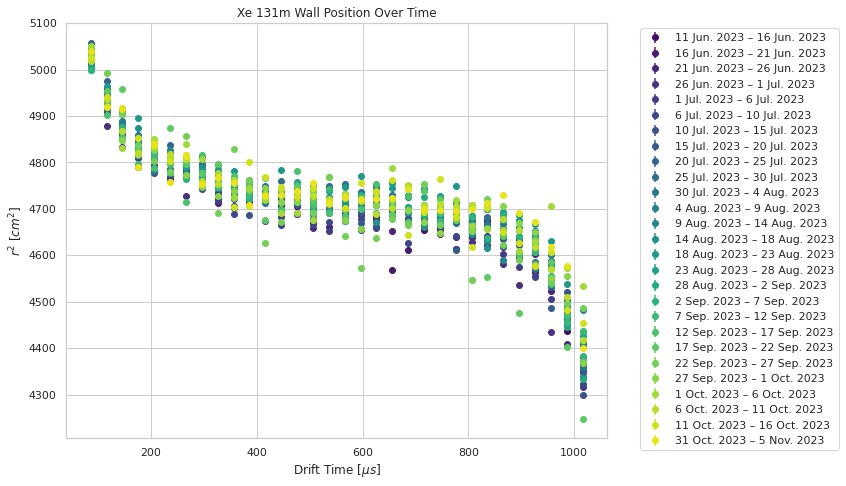

In [14]:
import seaborn as sns

# Set the seaborn style
sns.set(style="whitegrid")

# Get a color palette with the desired number of colors
colors = sns.color_palette("viridis", n_colors=len(df))

# Initialize the figure
plt.figure(figsize=(12, 7))

# Iterate through each time slice
for i in range(len(df)):
    x = df['dT_middle'][i]
    y = df['r2_cm2_hh'][i]
    y_err = df['d_r2_cm2_hh'][i]

    # Plot the data points with error bars
    plt.errorbar(x, y, yerr=y_err, marker='o', ls='none', label=df['Time Interval'][i], color=colors[i])

# Set labels and title
plt.xlabel('Drift Time [$\mu s$]')
plt.ylabel('$r^2$ [${cm}^2$]')
plt.title('Xe 131m Wall Position Over Time')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

In [15]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from PIL import Image
# import io

# # Set the seaborn style
# sns.set(style="whitegrid")

# # Get a color palette with the desired number of colors
# colors = sns.color_palette("viridis", n_colors=len(df))

# # Initialize the figure
# fig, ax = plt.subplots(figsize=(12, 7))

# # Function to update the plot for each frame
# def update(frame):
#     ax.clear()

#     x_values = df['dT_middle'][frame]
#     y_values = df['r2_cm2_hh'][frame]
#     y_err_values = df['d_r2_cm2_hh'][frame]

#     for x, y, y_err in zip(x_values, y_values, y_err_values):
#         ax.errorbar(x, y, yerr=y_err, fmt='o', color="xkcd:cornflower")

#     # Set the title with the corresponding time interval
#     ax.set_title(f'Xe 131m Wall Position Over Time: {df["Time Interval"][frame]}')

#     ax.set_xlabel('Drift Time [$\mu s$]')
#     ax.set_ylabel('$r^2$ [${cm}^2$]')
    
#     ax.set_xlim(0,1200)
#     ax.set_ylim(4000,5150)

# # Create the animation
# animation = FuncAnimation(fig, update, frames=len(df), interval=200)

# # Save each frame as an image
# frames = []
# for i in range(len(df)):
#     update(i)
#     buf = io.BytesIO()
#     plt.savefig(buf, format='png')
#     buf.seek(0)
#     frames.append(Image.open(buf))

# # Save the frames as a GIF
# frames[0].save('animation.gif', save_all=True, append_images=frames[1:], duration=500, loop=0)

In [16]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from PIL import Image
# import io

# # Set the seaborn style
# sns.set(style="whitegrid")

# # Get a color palette with the desired number of colors
# colors = sns.color_palette("viridis", n_colors=len(df))

# # Initialize the figure
# fig, ax = plt.subplots(figsize=(12, 7))

# # Function to update the plot for each frame
# def update(frame):
#     ax.clear()

#     # Plot lines connecting consecutive points
#     x_values = df['dT_middle'][frame]
#     y_values = df['r2_cm2_hh'][frame]
#     y_err_values = df['d_r2_cm2_hh'][frame]

#     for i in range(len(x_values) - 1):
#         ax.plot([x_values[i], x_values[i + 1]], [y_values[i], y_values[i + 1]], color="xkcd:gray")

#     # Plot points with error bars
#     for x, y, y_err in zip(x_values, y_values, y_err_values):
#         ax.errorbar(x, y, yerr=y_err, fmt='o', color="xkcd:cornflower")

#     # Set the title with the corresponding time interval
#     ax.set_title(f'Xe 131m Wall Position Over Time: {df["Time Interval"][frame]}')

#     ax.set_xlabel('Drift Time [$\mu s$]')
#     ax.set_ylabel('$r^2$ [${cm}^2$]')
    
#     ax.set_xlim(0, 1200)
#     ax.set_ylim(4000, 5150)

# # Create the animation
# animation = FuncAnimation(fig, update, frames=len(df), interval=200)

# # Save each frame as an image
# frames = []
# for i in range(len(df)):
#     update(i)
#     buf = io.BytesIO()
#     plt.savefig(buf, format='png')
#     buf.seek(0)
#     frames.append(Image.open(buf))

# # Save the frames as a GIF
# frames[0].save('Xe131m_wall_over_time.gif', save_all=True, append_images=frames[1:], duration=50, loop=0)

# # Create a final plot with the first and last entries
# fig, ax = plt.subplots(figsize=(12, 7))

# # Plot lines connecting consecutive points
# x_values_first = df['dT_middle'].iloc[0]
# y_values_first = df['r2_cm2_hh'].iloc[0]
# for i in range(len(x_values_first) - 1):
#     ax.plot([x_values_first[i], x_values_first[i + 1]], [y_values_first[i], y_values_first[i + 1]], color="xkcd:gray")

# # Plot points with error bars
# ax.errorbar(x_values_first, y_values_first, yerr=df['d_r2_cm2_hh'].iloc[0], fmt='o', color="xkcd:red orange", label='First Entry')

# x_values_last = df['dT_middle'].iloc[-1]
# y_values_last = df['r2_cm2_hh'].iloc[-1]
# for i in range(len(x_values_last) - 1):
#     ax.plot([x_values_last[i], x_values_last[i + 1]], [y_values_last[i], y_values_last[i + 1]], color="xkcd:gray")

# # Plot points with error bars
# ax.errorbar(x_values_last, y_values_last, yerr=df['d_r2_cm2_hh'].iloc[-1], fmt='o', color="xkcd:cornflower", label='Last Entry')

# # Set labels and title
# ax.set_xlabel('Drift Time [$\mu s$]')
# ax.set_ylabel('$r^2$ [${cm}^2$]')
# ax.set_xlim(0, 1200)
# ax.set_ylim(4000, 5150)
# ax.set_title('Xe 131m Wall Position Over Time: First and Last Entries')
# ax.legend()
# plt.tight_layout()
# plt.show()


GIF saved to /global/homes/k/kwild/SR3RunsAnalysis/analysis/Xe131m_wall_over_time_combined.gif


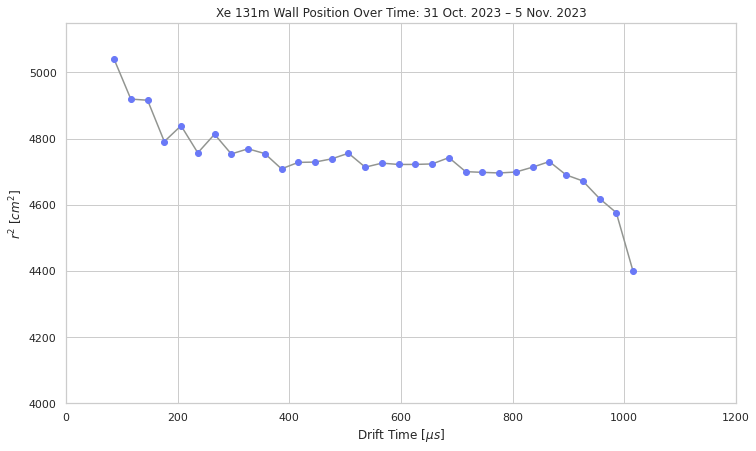

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image, ImageSequence
import io

# Set the seaborn style
sns.set(style="whitegrid")

# Create a figure for the individual plots
fig_individual, ax_individual = plt.subplots(figsize=(12, 7))

# Function to update the individual plot for each frame
def update_individual(frame):
    ax_individual.clear()

    x_values = df['dT_middle'][frame]
    y_values = df['r2_cm2_hh'][frame]
    y_err_values = df['d_r2_cm2_hh'][frame]

    # Plot lines connecting consecutive points
    for i in range(len(x_values) - 1):
        ax_individual.plot([x_values[i], x_values[i + 1]], [y_values[i], y_values[i + 1]], color="xkcd:gray")

    # Plot points with error bars
    for x, y, y_err in zip(x_values, y_values, y_err_values):
        ax_individual.errorbar(x, y, yerr=y_err, fmt='o', color="xkcd:cornflower")

    # Set the title with the corresponding time interval
    ax_individual.set_title(f'Xe 131m Wall Position Over Time: {df["Time Interval"][frame]}')

    ax_individual.set_xlabel('Drift Time [$\mu s$]')
    ax_individual.set_ylabel('$r^2$ [${cm}^2$]')

    ax_individual.set_xlim(0, 1200)
    ax_individual.set_ylim(4000, 5150)

# Create the individual animation
animation_individual = FuncAnimation(fig_individual, update_individual, frames=len(df), interval=200)

# Save each frame of the individual animation as an image
frames_individual = []
for i in range(len(df)):
    update_individual(i)
    buf = io.BytesIO()
    fig_individual.savefig(buf, format='png')
    buf.seek(0)
    frames_individual.append(Image.open(buf))

# Save the frames as a GIF with adjusted frame durations
gif_path = '/global/homes/k/kwild/SR3RunsAnalysis/analysis/Xe131m_wall_over_time_combined.gif'

# Extract the first frame for reference
first_frame = frames_individual[0]

# Save the frames with adjusted duration
frames_iter = ImageSequence.Iterator(first_frame)
frames_list = list(frames_iter)
frames_list[0].save(
    gif_path,
    save_all=True,
    append_images=frames_list[1:],
    duration=[1] * (len(frames_list) - 1) + [1000],  # Adjust duration for each frame (in milliseconds)
    loop=0
)

print(f'GIF saved to {gif_path}')


In [18]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from PIL import Image, ImageSequence
# import io

# # Set the seaborn style
# sns.set(style="whitegrid")

# # Create a figure for the individual plots
# fig_individual, ax_individual = plt.subplots(figsize=(12, 7))

# # Function to update the individual plot for each frame
# def update_individual(frame):
#     ax_individual.clear()

#     x_values = df['dT_middle'][frame]
#     y_values = df['r2_cm2_hh'][frame]
#     y_err_values = df['d_r2_cm2_hh'][frame]

#     # Plot lines connecting consecutive points
#     for i in range(len(x_values) - 1):
#         ax_individual.plot([x_values[i], x_values[i + 1]], [y_values[i], y_values[i + 1]], color="xkcd:gray")

#     # Plot points with error bars
#     for x, y, y_err in zip(x_values, y_values, y_err_values):
#         ax_individual.errorbar(x, y, yerr=y_err, fmt='o', color="xkcd:cornflower")

#     # Set the title with the corresponding time interval
#     ax_individual.set_title(f'Xe 131m Wall Position Over Time: {df["Time Interval"][frame]}')

#     ax_individual.set_xlabel('Drift Time [$\mu s$]')
#     ax_individual.set_ylabel('$r^2$ [${cm}^2$]')

#     ax_individual.set_xlim(0, 1200)
#     ax_individual.set_ylim(4000, 5150)

# # Create the individual animation
# animation_individual = FuncAnimation(fig_individual, update_individual, frames=len(df), interval=200)

# # Save each frame of the individual animation as an image
# frames_individual = []
# for i in range(len(df)):
#     update_individual(i)
#     buf = io.BytesIO()
#     fig_individual.savefig(buf, format='png')
#     buf.seek(0)
#     frames_individual.append(Image.open(buf))

# # Save the frames of the individual animation as a GIF
# frames_individual[0].save('animation_individual.gif', save_all=True, append_images=frames_individual[1:], duration=500, loop=0)

# # Create a final plot with the first and last entries
# fig_final, ax_final = plt.subplots(figsize=(12, 7))  # Set figsize here to match the individual plots

# # Plot lines connecting consecutive points for the first entry
# x_values_first = df['dT_middle'].iloc[0]
# y_values_first = df['r2_cm2_hh'].iloc[0]
# for i in range(len(x_values_first) - 1):
#     ax_final.plot([x_values_first[i], x_values_first[i + 1]], [y_values_first[i], y_values_first[i + 1]], color="xkcd:gray")

# # Plot points with error bars for the first entry
# ax_final.errorbar(x_values_first, y_values_first, yerr=df['d_r2_cm2_hh'].iloc[0], fmt='o', color="xkcd:red orange", label=f'{df["Time Interval"].iloc[0]}')

# # Plot lines connecting consecutive points for the last entry
# x_values_last = df['dT_middle'].iloc[-1]
# y_values_last = df['r2_cm2_hh'].iloc[-1]
# for i in range(len(x_values_last) - 1):
#     ax_final.plot([x_values_last[i], x_values_last[i + 1]], [y_values_last[i], y_values_last[i + 1]], color="xkcd:gray")

# # Plot points with error bars for the last entry
# ax_final.errorbar(x_values_last, y_values_last, yerr=df['d_r2_cm2_hh'].iloc[-1], fmt='o', color="xkcd:cornflower", label=f'{df["Time Interval"].iloc[-1]}')

# # Set labels and title for the final plot
# ax_final.set_xlabel('Drift Time [$\mu s$]')
# ax_final.set_ylabel('$r^2$ [${cm}^2$]')
# ax_final.set_xlim(0, 1200)
# ax_final.set_ylim(4000, 5150)
# ax_final.set_title('Xe 131m Wall Position Over Time: First and Last Entries')
# ax_final.legend()
# plt.tight_layout()

# # Save the final frame as an image
# buf_final = io.BytesIO()
# fig_final.savefig(buf_final, format='png')
# buf_final.seek(0)
# frame_final = Image.open(buf_final)

# # Combine the frames from the individual animation and the final frame
# frames_combined = frames_individual + [frame_final] * 20  # Repeat the final frame for 5 times

# # Save the frames as a GIF with adjusted frame durations
# gif_path = '/global/homes/k/kwild/SR3RunsAnalysis/analysis/Xe131m_wall_over_time_combined.gif'

# # Extract the first frame for reference
# first_frame = frames_combined[0]

# # Save the frames with adjusted duration
# frames_iter = ImageSequence.Iterator(first_frame)
# frames_list = list(frames_iter)
# frames_list[0].save(
#     gif_path,
#     save_all=True,
#     append_images=frames_list[1:],
#     duration=[100] * (len(frames_list) - 1) + [1],  # Adjust duration for each frame (in milliseconds)
#     loop=0
# )

# print(f'GIF saved to {gif_path}')


/cvmfs/lz.opensciencegrid.org/external/Python/3.8.9_CI/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


KeyboardInterrupt: 

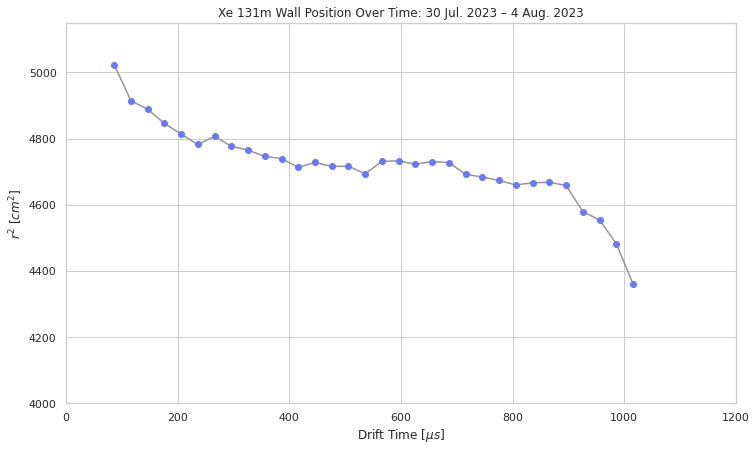

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image, ImageSequence
import io

# Set the seaborn style
sns.set(style="whitegrid")

# Create a figure for the individual plots
fig_individual, ax_individual = plt.subplots(figsize=(12, 7))

# Function to update the individual plot for each frame
def update_individual(frame):
    ax_individual.clear()

    x_values = df['dT_middle'][frame]
    y_values = df['r2_cm2_hh'][frame]
    y_err_values = df['d_r2_cm2_hh'][frame]

    # Plot lines connecting consecutive points
    for i in range(len(x_values) - 1):
        ax_individual.plot([x_values[i], x_values[i + 1]], [y_values[i], y_values[i + 1]], color="xkcd:gray")

    # Plot points with error bars
    for x, y, y_err in zip(x_values, y_values, y_err_values):
        ax_individual.errorbar(x, y, yerr=y_err, fmt='o', color="xkcd:cornflower")

    # Set the title with the corresponding time interval
    ax_individual.set_title(f'Xe 131m Wall Position Over Time: {df["Time Interval"][frame]}')

    ax_individual.set_xlabel('Drift Time [$\mu s$]')
    ax_individual.set_ylabel('$r^2$ [${cm}^2$]')

    ax_individual.set_xlim(0, 1200)
    ax_individual.set_ylim(4000, 5150)

# Create the individual animation
animation_individual = FuncAnimation(fig_individual, update_individual, frames=len(df), interval=200)

# Save each frame of the individual animation as an image
frames_individual = []
for i in range(len(df)):
    update_individual(i)
    buf = io.BytesIO()
    fig_individual.savefig(buf, format='png')
    buf.seek(0)
    frames_individual.append(Image.open(buf))

# Save the frames of the individual animation as a GIF
frames_individual[0].save('animation_individual.gif', save_all=True, append_images=frames_individual[1:], duration=3000, loop=0)

# Create a final plot with the first and last entries
fig_final, ax_final = plt.subplots(figsize=(12, 7))  # Set figsize here to match the individual plots

# Plot lines connecting consecutive points for the first entry
x_values_first = df['dT_middle'].iloc[0]
y_values_first = df['r2_cm2_hh'].iloc[0]
for i in range(len(x_values_first) - 1):
    ax_final.plot([x_values_first[i], x_values_first[i + 1]], [y_values_first[i], y_values_first[i + 1]], color="xkcd:gray")

# Plot points with error bars for the first entry
ax_final.errorbar(x_values_first, y_values_first, yerr=df['d_r2_cm2_hh'].iloc[0], fmt='o', color="xkcd:red orange", label=f'{df["Time Interval"].iloc[0]}')

# Plot lines connecting consecutive points for the last entry
x_values_last = df['dT_middle'].iloc[-1]
y_values_last = df['r2_cm2_hh'].iloc[-1]
for i in range(len(x_values_last) - 1):
    ax_final.plot([x_values_last[i], x_values_last[i + 1]], [y_values_last[i], y_values_last[i + 1]], color="xkcd:gray")

# Plot points with error bars for the last entry
ax_final.errorbar(x_values_last, y_values_last, yerr=df['d_r2_cm2_hh'].iloc[-1], fmt='o', color="xkcd:cornflower", label=f'{df["Time Interval"].iloc[-1]}')

# Set labels and title for the final plot
ax_final.set_xlabel('Drift Time [$\mu s$]')
ax_final.set_ylabel('$r^2$ [${cm}^2$]')
ax_final.set_xlim(0, 1200)
ax_final.set_ylim(4000, 5150)
ax_final.set_title('Xe 131m Wall Position Over Time: First and Last Entries')
ax_final.legend()
plt.tight_layout()

# Save the final frame as an image
buf_final = io.BytesIO()
fig_final.savefig(buf_final, format='png')
buf_final.seek(0)
frame_final = Image.open(buf_final)

# Combine the frames from the individual animation and the final frame
frames_combined = frames_individual + [frame_final] * 20  # Repeat the final frame for 5 times

# Save the frames as a GIF
frames_combined[0].save('/global/homes/k/kwild/SR3RunsAnalysis/analysis/Xe131m_wall_over_time_combined.gif', save_all=True, append_images=frames_combined[1:], duration=100, loop=0)




In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from PIL import Image, ImageSequence
# import io

# # Set the seaborn style
# sns.set(style="whitegrid")

# # Create a figure for the individual plots
# fig_individual, ax_individual = plt.subplots(figsize=(12, 7))

# # Function to update the individual plot for each frame
# def update_individual(frame):
#     ax_individual.clear()

#     x_values = df['dT_middle'][frame]
#     y_values = df['r2_cm2_hh'][frame]
#     y_err_values = df['d_r2_cm2_hh'][frame]

#     # Plot lines connecting consecutive points
#     for i in range(len(x_values) - 1):
#         ax_individual.plot([x_values[i], x_values[i + 1]], [y_values[i], y_values[i + 1]], color="xkcd:gray")

#     # Plot points with error bars
#     for x, y, y_err in zip(x_values, y_values, y_err_values):
#         ax_individual.errorbar(x, y, yerr=y_err, fmt='o', color="xkcd:cornflower")

#     # Set the title with the corresponding time interval
#     ax_individual.set_title(f'Xe 131m Wall Position Over Time: {df["Time Interval"][frame]}')

#     ax_individual.set_xlabel('Drift Time [$\mu s$]')
#     ax_individual.set_ylabel('$r^2$ [${cm}^2$]')

#     ax_individual.set_xlim(0, 1200)
#     ax_individual.set_ylim(4000, 5150)

# # Create the individual animation
# animation_individual = FuncAnimation(fig_individual, update_individual, frames=len(df), interval=200)

# # Save each frame of the individual animation as an image
# frames_individual = []
# for i in range(len(df)):
#     update_individual(i)
#     buf = io.BytesIO()
#     fig_individual.savefig(buf, format='png')
#     buf.seek(0)
#     frames_individual.append(Image.open(buf))

# # Save the frames as a GIF with adjusted frame durations
# gif_path = '/global/homes/k/kwild/SR3RunsAnalysis/analysis/Xe131m_wall_over_time_combined.gif'

# # Extract the first frame for reference
# first_frame = frames_individual[0]

# # Save the frames with adjusted duration
# frames_iter = ImageSequence.Iterator(first_frame)
# frames_list = list(frames_iter)
# frames_list[0].save(
#     gif_path,
#     save_all=True,
#     append_images=frames_list[1:],
#     duration=[200] * (len(frames_list) - 1) + [1000],  # Adjust duration for each frame (in milliseconds)
#     loop=0
# )

# print(f'GIF saved to {gif_path}')


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from PIL import Image
# import io

# # Set the seaborn style
# sns.set(style="whitegrid")

# # Create a figure for the individual plots
# fig_individual, ax_individual = plt.subplots(figsize=(12, 7))

# # Function to update the individual plot for each frame
# def update_individual(frame):
#     ax_individual.clear()

#     x_values = df['dT_middle'][frame]
#     y_values = df['r2_cm2_hh'][frame]
#     y_err_values = df['d_r2_cm2_hh'][frame]

#     # Plot lines connecting consecutive points
#     for i in range(len(x_values) - 1):
#         ax_individual.plot([x_values[i], x_values[i + 1]], [y_values[i], y_values[i + 1]], color="xkcd:gray")

#     # Plot points with error bars
#     for x, y, y_err in zip(x_values, y_values, y_err_values):
#         ax_individual.errorbar(x, y, yerr=y_err, fmt='o', color="xkcd:cornflower")

#     # Set the title with the corresponding time interval
#     ax_individual.set_title(f'Xe 131m Wall Position Over Time: {df["Time Interval"][frame]}')

#     ax_individual.set_xlabel('Drift Time [$\mu s$]')
#     ax_individual.set_ylabel('$r^2$ [${cm}^2$]')

#     ax_individual.set_xlim(0, 1200)
#     ax_individual.set_ylim(4000, 5150)

# # Create the individual animation
# animation_individual = FuncAnimation(fig_individual, update_individual, frames=len(df), interval=100)

# # Save each frame of the individual animation as an image
# frames_individual = []
# for i in range(len(df)):
#     update_individual(i)
#     buf = io.BytesIO()
#     fig_individual.savefig(buf, format='png')
#     buf.seek(0)
#     frames_individual.append(Image.open(buf))

# # Save the frames of the individual animation as a GIF
# frames_individual[0].save('animation_individual.gif', save_all=True, append_images=frames_individual[1:], duration=100, loop=0)

# # Create a final plot with the first and last entries
# fig_final, ax_final = plt.subplots(figsize=(12, 7))

# # Plot lines connecting consecutive points for the first entry
# x_values_first = df['dT_middle'].iloc[0]
# y_values_first = df['r2_cm2_hh'].iloc[0]
# for i in range(len(x_values_first) - 1):
#     ax_final.plot([x_values_first[i], x_values_first[i + 1]], [y_values_first[i], y_values_first[i + 1]], color="xkcd:gray")

# # Plot points with error bars for the first entry
# ax_final.errorbar(x_values_first, y_values_first, yerr=df['d_r2_cm2_hh'].iloc[0], fmt='o', color="xkcd:red orange", label=f'First Entry: {df["Time Interval"].iloc[0]}')

# # Plot lines connecting consecutive points for the last entry
# x_values_last = df['dT_middle'].iloc[-1]
# y_values_last = df['r2_cm2_hh'].iloc[-1]
# for i in range(len(x_values_last) - 1):
#     ax_final.plot([x_values_last[i], x_values_last[i + 1]], [y_values_last[i], y_values_last[i + 1]], color="xkcd:gray")

# # Plot points with error bars for the last entry
# ax_final.errorbar(x_values_last, y_values_last, yerr=df['d_r2_cm2_hh'].iloc[-1], fmt='o', color="xkcd:cornflower", label=f'{df["Time Interval"].iloc[-1]}')

# # Set labels and title for the final plot
# ax_final.set_xlabel('Drift Time [$\mu s$]')
# ax_final.set_ylabel('$r^2$ [${cm}^2$]')
# ax_final.set_xlim(0, 1200)
# ax_final.set_ylim(4000, 5150)
# ax_final.set_title('Xe 131m Wall Position Over Time: First and Last Entries')
# ax_final.legend()
# plt.tight_layout()

# # Save the final frame as an image
# buf_final = io.BytesIO()
# fig_final.savefig(buf_final, format='png')
# buf_final.seek(0)
# frame_final = Image.open(buf_final)

# # Combine the frames from the individual animation and the final frame
# frames_combined = frames_individual + [frame_final] * 20  # Repeat the final frame for 5 times

# # Save the frames as a GIF
# frames_combined[0].save('Xe131m_wall_over_time_combined.gif', save_all=True, append_images=frames_combined[1:], duration=100, loop=0)


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from PIL import Image
# import io

# # Set the seaborn style
# sns.set(style="whitegrid")

# # Create a figure for the combined plot
# fig_combined, ax_combined = plt.subplots(figsize=(12, 7))

# # Function to update the combined plot for each frame
# def update_combined(frame):
#     ax_combined.clear()

#     # Plot lines connecting consecutive points
#     x_values = df['dT_middle'][frame]
#     y_values = df['r2_cm2_hh'][frame]
#     y_err_values = df['d_r2_cm2_hh'][frame]

#     for i in range(len(x_values) - 1):
#         ax_combined.plot([x_values[i], x_values[i + 1]], [y_values[i], y_values[i + 1]], color="xkcd:gray")

#     # Plot points with error bars for intermediate points
#     for x, y, y_err in zip(x_values, y_values, y_err_values):
#         ax_combined.errorbar(x, y, yerr=y_err, fmt='o', color="xkcd:cornflower", alpha=0.5)

#     # Plot points with error bars for the first and last entries
#     x_values_first = df['dT_middle'].iloc[0]
#     y_values_first = df['r2_cm2_hh'].iloc[0]
#     x_values_last = df['dT_middle'].iloc[-1]
#     y_values_last = df['r2_cm2_hh'].iloc[-1]

#     ax_combined.errorbar(x_values_first, y_values_first, yerr=df['d_r2_cm2_hh'].iloc[0], fmt='o', color="xkcd:red orange", label=f'First Entry: {df["Time Interval"].iloc[0]}')
#     ax_combined.errorbar(x_values_last, y_values_last, yerr=df['d_r2_cm2_hh'].iloc[-1], fmt='o', color="xkcd:cornflower", label=f'Last Entry: {df["Time Interval"].iloc[-1]}')

#     # Set the title with the corresponding time interval
#     ax_combined.set_title(f'Xe 131m Wall Position Over Time: {df["Time Interval"][frame]}')

#     ax_combined.set_xlabel('Drift Time [$\mu s$]')
#     ax_combined.set_ylabel('$r^2$ [${cm}^2$]')

#     ax_combined.set_xlim(0, 1200)
#     ax_combined.set_ylim(4000, 5150)

#     # Display the legend only on the last frame
#     if frame == len(df) - 1:
#         ax_combined.legend()

# # Create the combined animation
# animation_combined = FuncAnimation(fig_combined, update_combined, frames=len(df), interval=100)

# # Save each frame of the combined animation as an image
# frames_combined = []
# for i in range(len(df)):
#     update_combined(i)
#     buf = io.BytesIO()
#     fig_combined.savefig(buf, format='png')
#     buf.seek(0)
#     frames_combined.append(Image.open(buf))

# # Save the frames of the combined animation as a GIF
# frames_combined[0].save('Xe131m_wall_over_time_final.gif', save_all=True, append_images=frames_combined[1:], duration=100, loop=0)


In [ ]:

# r2_data_for_interval = all_data_dict['11 Jun. 2023 – 16 Jun. 2023']['r2_cm2_hh']
# d_r2_data_for_interval = all_data_dict['11 Jun. 2023 – 16 Jun. 2023']['d_r2_cm2_hh']
# dT_data_for_interval = all_data_dict['11 Jun. 2023 – 16 Jun. 2023']['dT_middle']

In [ ]:
# # Assuming time_int_wall_dict is your dictionary
# key_list = list(time_int_wall_dict.keys())

# # Assuming time_int_wall_dict is your dictionary
# for key in key_list:
#     print("time interval: ", key)
    
#     # Accessing values from the nested dictionary
#     r2_cm2_hh_dat = time_int_wall_dict[key]['r2_cm2_hh_dat']
#     d_r2_cm2_hh_dat = time_int_wall_dict[key]['d_r2_cm2_hh_dat']
#     dT_middle_dat = time_int_wall_dict[key]['dT_middle_dat']

#     # Iterate over the values in the lists
#     for i in range(len(r2_cm2_hh_dat)):
#         r2_cm2_hh = r2_cm2_hh_dat[i]
#         d_r2_cm2_hh = d_r2_cm2_hh_dat[i]
#         dT_middle = dT_middle_dat[i]

#         print("r^2 :", r2_cm2_hh)
#         print("d_r^2 :", d_r2_cm2_hh)
#         print("dT :", dT_middle)